# 한글 워드크라우드

In [1]:
#한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 다시시작

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [4]:
#konlpy 설치
!pip install konlpy > /dev/null

������ ��θ� ã�� �� �����ϴ�.


In [ ]:
#한글 형태소 분석기
#!pip install konlpy
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [8]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [9]:
# 품사 태깅(part-of speech tagging)
# http://kkma.snu.ac.kr/documents/?doc=postag
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


* 명사만 추출

In [10]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


# 워드크라우드 
* 한빛출판네트워크 > 새로나온책 200권 > tag
* tag를 워드크라우드로 만들기


## 1.크롤링

In [9]:
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [ ]:
https://www.hanbit.co.kr/store/books/new_book_list.html

In [10]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser') 

In [12]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [15]:
li = lis[0]
href = li.find('a')['href']
href

'/store/books/look.php?p_code=B4422381134'

In [16]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [17]:
tags = book_soup.select('.tag_area > a')
len(tags)

18

In [18]:
tag_list = []
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['시계', '달력', '시계보기', '달력보기', '수학워크북', '입학준비수학', '유아수학', '수학홈스쿨', '입학준비', '입학준비수학', '7살수학', '7살수학', '수학학습', '수학준비', '수학완성', '예비초등수학', '초등학습', '영역별수학']


In [25]:
tag_list = []
for page in tqdm(range(1, 11)):
    url = f'{base_url}{sub_url}?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser') 
    lis = soup.select('.sub_book_list')

    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(base_url + book_url)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        tags = book_soup.select('.tag_area > a')
        for a in tags:
            tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [26]:
tag_list[100:150]

['CI/CD 파이프라인',
 '인공지능',
 '4차 산업혁명',
 '미래',
 '트렌드',
 '기술',
 '리카이푸',
 '천치우판',
 '악필교정',
 '손글씨',
 '펜글씨',
 '글씨교정',
 '바른글씨',
 '예쁜글씨',
 '캘리그라피',
 '유튜브',
 '유튜버',
 '크리에이터',
 '강차분PD',
 '나는유튜버다',
 '유튜브 채널 기획',
 '유튜브 채널 운영',
 '채널운영전략',
 '알고리즘인플루언서',
 '부업',
 '돈벌기',
 '프로덕트매니저',
 'PM',
 '프로젝트',
 '리더',
 'project',
 '제품',
 'product',
 '구현',
 '운영',
 '자기계발',
 '기획서',
 '요구사항 정의서',
 '화면 설계서',
 '테스트',
 '배포',
 '시나리오',
 '리더',
 '컴퓨터 비전',
 '딥러닝',
 '파이썬',
 'OpenCV',
 '텐서플로',
 '유령',
 '탐정']

In [27]:
len(tag_list)

2155

## 워드크라우드 만들기
 * tag_list를 frequency dictionary로 만들기

In [29]:
tag_set = set(tag_list)
len(tag_set)

1542

In [30]:
tag_dict = {}
for item in tag_set:
    tag_dict[item] = tag_list.count(item)

In [ ]:
#tag_dict = {item:tag_list.count(item) for item in tag_set}

In [ ]:
tag_dict

In [ ]:
count = 0
for key, val in tag_dict.items():
    print(key, ':', val)
    count +=1
    if count > 5:
        break

## 워드크라우드 만들기

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [37]:
wc = WordCloud(background_color='white', random_state=2023, font_path=font_path)
wc = wc.generate_from_frequencies(tag_dict)

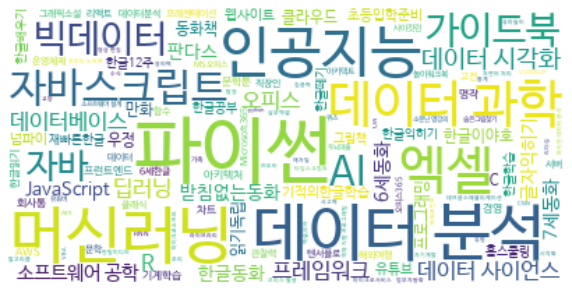

In [38]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 단어를 펼쳐서 워드크라우드 만들어보기


In [40]:
tag_text =  ' '.join(tag_list)

In [41]:
wc = WordCloud(background_color='white', random_state=2023, font_path=font_path,
               max_words=500)
wc = wc.generate(tag_text)

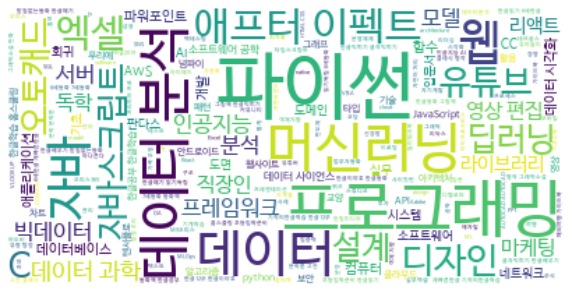

In [42]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()